Jupyter Notebook for plotting the figures of the manuscript *Phenotypic response of yeast metabolic network to availability of proteinogenic amino acids* Vetle Simensen, Yara Seif & Eivind Almaas

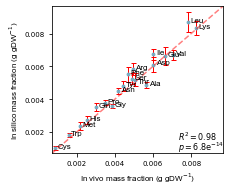

In [8]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

dir_name = sys.path[0]
font_type = 'Arial'
font_size = 8
cm = 1/2.54

# Fig. 1 Prediction of proteinogenic amino acid usage
df = pd.read_csv(dir_name + '/data/aaCorrDat.csv')
q_aa = df['qAAmassFrac']
sim_aa = df['simAAmassFrac']
max_flux = df['aaMax']
min_flux = df['aaMin']
err = max_flux - min_flux

# Correlation plot
offset = 0.00014
aa_codes = ['Ala', 'Cys', 'Asp', 'Glu', 'Phe', 'Gly', 'His', 'Ile', 'Lys',
             'Leu', 'Met', 'Asn', 'Pro', 'Gln', 'Arg', 'Ser', 'Thr', 'Val', 'Trp', 'Tyr']
fig, ax = plt.subplots(figsize=(cm * 8.5, 2.8))
plt.scatter(q_aa, sim_aa, s=8, zorder=2, c='#75ACC3')
lims = [np.min(min_flux) * 0.7, np.max(max_flux) * 1.06]
ax.set_xlim(lims)
ax.set_ylim(lims)

# Add y = x stapled line and errorbars
plt.plot(lims, lims, 'r--', alpha=0.5)
plt.errorbar(q_aa, sim_aa, yerr=err, linestyle='None', c='r', zorder=1, linewidth=1, capsize=2.5)

# Axis and data labels
plt.xlabel('In vivo mass fraction (g gDW$^{-1}$)', fontname=font_type, fontsize=8)
plt.ylabel('In silico mass fraction (g gDW$^{-1}$)', fontname=font_type, fontsize=8)

for i, txt in enumerate(aa_codes):
    if txt == 'Thr':
        ax.annotate(txt, (q_aa[i] + offset, sim_aa[i] - offset * 1.5), fontname=font_type, fontsize=8)
    else:
        ax.annotate(txt, (q_aa[i] + offset, sim_aa[i]), fontname=font_type, fontsize=8)
    

ax.text(0.0073, 0.0015, r'$R^2=0.98$', fontname=font_type, fontsize=8)
ax.text(0.0073, 0.0009, r'$p=6.8\mathrm{e}^{-14}$', fontname=font_type, fontsize=8)
plt.subplots_adjust(left=0.19)
plt.subplots_adjust(bottom=0.15)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.savefig(dir_name + '/figures/fig_1.pdf', format='pdf')

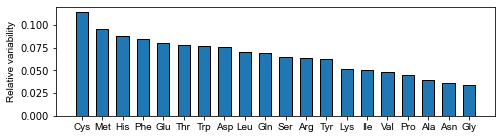

In [9]:
# S1 Fig. Relative variability of amino acids
sim_aa_rel = err / sim_aa
df = pd.DataFrame({'aaCodes': aa_codes, 'aaRelVar': sim_aa_rel})
df = df.sort_values(by=['aaRelVar'], ascending=0)
x = df['aaCodes'].to_list()
y = df['aaRelVar'].to_numpy()
fig, ax = plt.subplots(figsize=(cm * 20, 2))
plt.bar(x, y, edgecolor='k', width=0.6)
plt.xticks(range(20), x, fontname=font_type)
plt.ylabel('Relative variability', fontname=font_type)
plt.savefig(dir_name + '/figures/S1_fig.pdf', format='pdf')

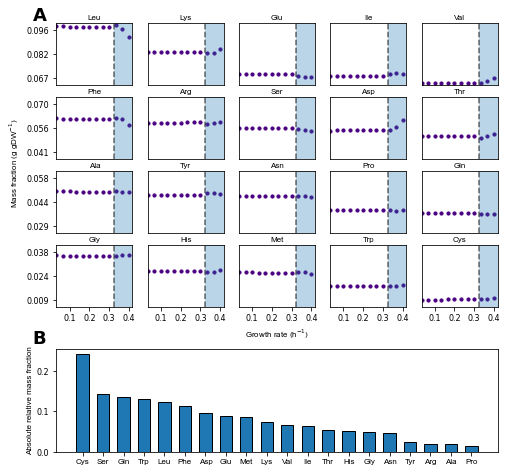

In [10]:
# Fig. 2 Amino acid usage at varying growth rates
aa_sctr_usage = np.genfromtxt(dir_name + '/data/aaUsage.csv', delimiter=',')
g_rates = np.genfromtxt(dir_name + '/data/growthRates.csv', delimiter=',')
abs_rel_diff = pd.read_csv(dir_name + '/data/absRelDiff.csv')

# Relative mass fractions
aa_sctr_usage = (aa_sctr_usage.T/aa_sctr_usage.sum(axis=1)).T

# Sort columns by elements in the first row (comparable y-axis ranges for each row in scatter plots)
df_sctr = pd.DataFrame(aa_sctr_usage, columns=aa_codes)
df_sctr = df_sctr.sort_values(by=df.index[0], axis=1, ascending=False)

# Define subgrid specs
fig = plt.figure(figsize=(cm * 20, 7))
gs0 = fig.add_gridspec(12, 12)

# (A) Scatter plot
gs00 = gs0[:8,1:].subgridspec(4, 5)
k = 0
y_min = [0.067, 0.041, 0.029, 0.009]
y_max = [0.096, 0.070, 0.058, 0.038]
for i in range(4):
    for j in range(5):
        ax = fig.add_subplot(gs00[i,j])
        ax.scatter(g_rates, df_sctr.iloc[:,k].to_numpy(), s=10, c='#4B0082')
        plt.title(df_sctr.columns[k], fontname=font_type, fontsize=font_size, y=0.96)
        k += 1

        # Set x-axis
        ax.xaxis.set_ticks([0.1, 0.2, 0.3, 0.4])
        plt.xticks(fontsize=font_size)

        # Shaded area at protein-constrained growth
        xlim = max(ax.get_xlim())
        x = g_rates[-3] - 0.01
        ax.autoscale(enable=True, axis='x', tight=True)
        ax.axvspan(x, xlim, alpha=0.3)
        ax.axvline(x, color='k', linestyle='--', alpha=0.6)

        # Add x-label
        if i == 3 and j == 2:
            plt.xlabel('Growth rate (h$^{-1}$)', fontname=font_type, fontsize=font_size)
        
        # Remove x- and y-ticks
        if i < 3:
            plt.xticks([])
        if j > 0:
            plt.yticks([])
        else:
            ax.yaxis.set_ticks([y_min[i], (y_min[i] + y_max[i]) / 2, y_max[i]])
            plt.yticks(fontsize=font_size)
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
        
        ax.set_ylim(y_min[i] - 0.004, y_max[i] + 0.004)

# (B) Bar plot
ax = fig.add_subplot(gs0[9:,1:])
x = abs_rel_diff['Amino acids']
y = abs_rel_diff['AbsRelDiff']
ax.bar(x, y, edgecolor='k', width=0.6)
plt.xticks(range(20), x, fontname=font_type, fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.ylabel('Absolute relative mass fraction', fontname=font_type, fontsize=font_size)
plt.subplots_adjust(left=0.05)
plt.subplots_adjust(bottom=0.03)

# Add subfigure labels and x-label to subfigure (A)
fig.text(0.08, 0.885, 'A', fontsize=18, fontweight='bold')
fig.text(0.08, 0.245, 'B', fontsize=18, fontweight='bold')
fig.text(0.035, 0.52, 'Mass fraction (g gDW$^{-1}$)', rotation=90, fontname=font_type, fontsize=font_size)

plt.savefig(dir_name + '/figures/fig_2.pdf', format='pdf')

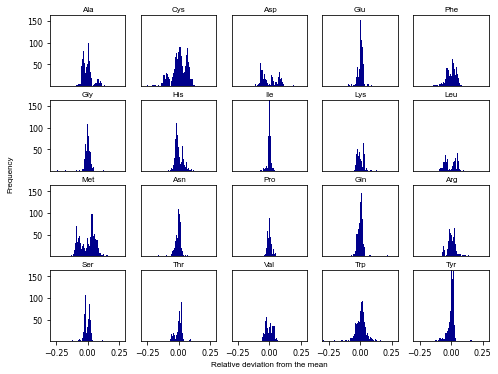

In [11]:
# Fig. 3 Nutrient sampling and amino acid usage
aa_mat = np.genfromtxt(dir_name + '/data/aaMatDefault.csv', delimiter=',')
aa_mat = 1 - aa_mat / aa_mat.mean(axis=0)

fig = plt.figure(figsize=(cm * 20, 6))
fig.tight_layout()
fig.text(0.05, 0.47, 'Frequency', rotation=90, fontname=font_type, fontsize=font_size)
k = 0
for i in range(4):
    for j in range(5):
        ax = plt.subplot(4, 5, k + 1)
        plt.hist(aa_mat[:,k], bins=600, color='#00008b')
        ax.set_xlim(-0.3, 0.3)
        ax.set_ylim(1, 165)
        plt.xticks(fontsize=font_size)
        plt.yticks(fontsize=font_size)

        # Remove x- and y-ticks
        if i < 3:
            plt.xticks([])
        if j > 0:
            plt.yticks([])

        # Add title
        plt.title(aa_codes[k], fontname=font_type, fontsize=font_size, y=0.96)

        # Add x-label
        if i == 3 and j == 2:
            plt.xlabel('Relative deviation from the mean', fontname=font_type, fontsize=font_size)
        k += 1

plt.savefig(dir_name + '/figures/fig_3.pdf', format='pdf')

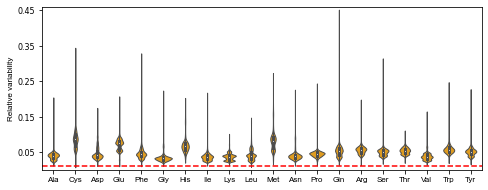

In [12]:
# Fig. 4 Sensitivity towards perturbations in amino acid availability
aa_min_mat = np.genfromtxt(dir_name + '/data/aaMinDefault.csv', delimiter=',')
aa_max_mat = np.genfromtxt(dir_name + '/data/aaMaxDefault.csv', delimiter=',')
aa_mat = np.genfromtxt(dir_name + '/data/aaMatDefault.csv', delimiter=',')

# Construct DataFrame
row_list = []
n_rows = np.size(aa_mat, axis=0)
n_cols = np.size(aa_mat, axis=1)
for i in range(n_rows):
    for j in range(n_cols):
        amino_acid = aa_codes[j]
        mean_flux = (aa_max_mat[i,j] + aa_min_mat[i,j]) / 2
        min_range_norm = (mean_flux - aa_min_mat[i,j]) / mean_flux
        max_range_norm = (aa_max_mat[i,j] - mean_flux) / mean_flux
        row_dict_min = {'amino_acid':amino_acid, 'flux_range':min_range_norm, 'min_max':'min'}
        row_dict_max = {'amino_acid':amino_acid, 'flux_range':max_range_norm, 'min_max':'max'}
        row_list.append(row_dict_min)
        row_list.append(row_dict_max)

df = pd.DataFrame(row_list)

# Mean-normalize flux ranges
aa_ranges = np.divide(aa_max_mat - aa_min_mat, (aa_max_mat + aa_min_mat) / 2)

# Plot figure
fig, ax = plt.subplots(figsize=(cm * 20, 3))
v = sns.violinplot(data=aa_ranges, color='orange', xlabels=aa_codes, linewidth=1)
plt.ylabel('Relative variability', fontname=font_type, fontsize=font_size)
plt.axhline(y=0.01, color='r', linestyle='--')
v.set_xticklabels(aa_codes, fontname=font_type, fontsize=font_size)
plt.ylim([0, 0.46])
ax.set_yticks([0.05, 0.15, 0.25, 0.35, 0.45])
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.savefig(dir_name + '/figures/fig_4.pdf', format='pdf')


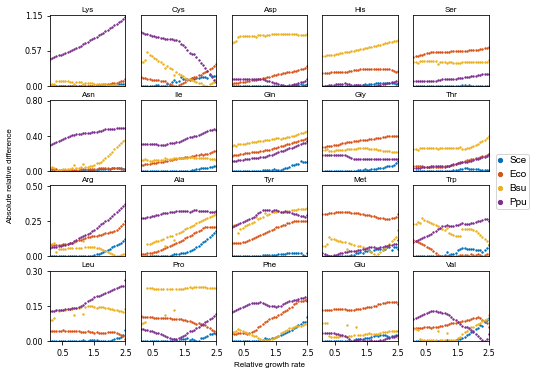

In [13]:
# Fig. 5 Organism-specific amino acid distributions
aa_sce = np.genfromtxt(dir_name + '/data/aaSce.csv', delimiter=',')
aa_eco = np.genfromtxt(dir_name + '/data/aaEco.csv', delimiter=',')
aa_bsu = np.genfromtxt(dir_name + '/data/aaBsu.csv', delimiter=',')
aa_pse = np.genfromtxt(dir_name + '/data/aaPse.csv', delimiter=',')
org_gr_rates = np.genfromtxt(dir_name + '/data/orgRelGrowthRates.csv', delimiter=',')

# Plot indices (similar y-axis ranges)
pltIndx = [8, 1, 2, 6, 15, 11, 7, 13, 5, 16, 14, 0, 19, 10, 18, 9, 12, 4, 3, 17]

# Define figure
fig = plt.figure(figsize=(cm * 20, 6))
fig.tight_layout()
fig.text(0.05, 0.4, 'Absolute relative difference', rotation=90, fontname=font_type, fontsize=font_size)

k = 0
y_max = [1.15, 0.8, 0.5, 0.3]
for i in range(4):
    for j in range(5):
        ax = plt.subplot(4, 5, k + 1)
        ax.scatter(org_gr_rates, aa_sce[pltIndx[k],:], s=2, c='#0072BD')
        ax.scatter(org_gr_rates, aa_eco[pltIndx[k],:], s=2, c='#D95319')
        ax.scatter(org_gr_rates, aa_bsu[pltIndx[k],:], s=2, c='#EDB120')
        ax.scatter(org_gr_rates, aa_pse[pltIndx[k],:], s=2, c='#7E2F8E')
        plt.title(aa_codes[pltIndx[k]], fontname=font_type, fontsize=font_size, y=0.96)
        k += 1

        # Set x-axis
        ax.xaxis.set_ticks([0.5, 1.5, 2.5])
        plt.xticks(fontsize=font_size)

        # Add x-label
        if i == 3 and j == 2:
            plt.xlabel('Relative growth rate', fontname=font_type, fontsize=font_size)
        
        # Remove x- and y-ticks
        if i < 3:
            plt.xticks([])
        if j > 0:
            plt.yticks([])
        else:
            ax.yaxis.set_ticks([0, y_max[i] / 2, y_max[i]])
            plt.yticks(fontsize=font_size)
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        
        ax.set_ylim(0, y_max[i] + 0.004)
        ax.set_xlim(0.1, 2.5)

fig.legend(['Sce', 'Eco', 'Bsu', 'Ppu'], bbox_to_anchor=(0.98, 0.42),loc = 'lower right',
                borderpad=0.2, markerscale=3, handlelength=0.4, prop={'family': font_type}, fontsize=font_size)
plt.savefig(dir_name + '/figures/fig_5.pdf', format='pdf')

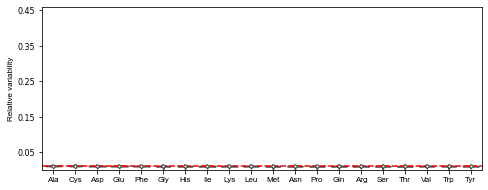

In [14]:
# S2 Fig. Sensitivity towards perturbations in amino acid availability
aa_min_mat = np.genfromtxt(dir_name + '/data/aaMinMatUniversal.csv', delimiter=',')
aa_max_mat = np.genfromtxt(dir_name + '/data/aaMaxMatUniversal.csv', delimiter=',')
aa_mat = np.genfromtxt(dir_name + '/data/aaMatUniversal.csv', delimiter=',')

# Construct DataFrame
row_list = []
n_rows = np.size(aa_mat, axis=0)
n_cols = np.size(aa_mat, axis=1)
for i in range(n_rows):
    for j in range(n_cols):
        amino_acid = aa_codes[j]
        mean_flux = (aa_max_mat[i,j] + aa_min_mat[i,j]) / 2
        min_range_norm = (mean_flux - aa_min_mat[i,j]) / mean_flux
        max_range_norm = (aa_max_mat[i,j] - mean_flux) / mean_flux
        row_dict_min = {'amino_acid':amino_acid, 'flux_range':min_range_norm, 'min_max':'min'}
        row_dict_max = {'amino_acid':amino_acid, 'flux_range':max_range_norm, 'min_max':'max'}
        row_list.append(row_dict_min)
        row_list.append(row_dict_max)

df = pd.DataFrame(row_list)

# Mean-normalize flux ranges
aa_ranges = np.divide(aa_max_mat - aa_min_mat, (aa_max_mat + aa_min_mat) / 2)


# Plot figure
fig, ax = plt.subplots(figsize=(cm * 20, 3))
v = sns.violinplot(data=aa_ranges, color='orange', xlabels=aa_codes)
plt.ylabel('Relative variability', fontname=font_type, fontsize=font_size)
plt.axhline(y=0.01, color='r', linestyle='--')
v.set_xticklabels(aa_codes, fontname=font_type, fontsize=font_size)
plt.ylim([0, 0.46])
ax.set_yticks([0.05, 0.15, 0.25, 0.35, 0.45])
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.savefig(dir_name + '/figures/S2_fig.pdf', format='pdf')
